In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline
import os, random
from shutil import copytree
# data_path =  '/Volumes/Backups/data/LUNA16/patches/50x50/'
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [3]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [4]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [5]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [6]:
model = Vgg16BN((100,100)).model

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 100, 100)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [7]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 100, 100)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 102, 102)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 100, 100)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 102, 102)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [8]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
from skimage import color

In [10]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [11]:
np_img = np.zeros((1,224,224))

In [12]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [13]:
data_path # /Volumes/Backups/data/LUNA16/patches/224x224/patches1/

'/Volumes/Backups/data/LUNA16/patches/'

In [14]:
import glob2
from skimage import color
image_labels = []

# input_path = data_path + "224x224/"
# img_size = 224

input_path = data_path + "100x100/"
img_size = 100

ctr = 0
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,img_size,img_size),dtype=np.float32)
# img_array = np.zeros((ctr,3,50,50),dtype=np.float32)


i=0
nKind = 0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(input_path)):
    print(filename)
    for image_name in  glob2.glob(input_path + filename+'/*'):
        print(image_name)
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        img = color.gray2rgb(load_array(image_name)).astype(np.float32)
        img_array[i] = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        i += 1
        print(i)
        if i >= 3000 + nKind:
            nKind = 3000
            break



patches0
patches1
patches0
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439457_100x100.bc
1
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439458_100x100.bc
2
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439583_100x100.bc
3
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439662_100x100.bc
4
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439978_100x100.bc
5
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439985_100x100.bc
6
/Volumes/Backups/data/LUNA16/patches/100x100/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274653_100x100.bc
7


In [15]:
img_array = img_array[:4351]

In [16]:
img_array.shape

(4351, 3, 100, 100)

In [17]:
img_array[0,0]

array([[   2.1857,    4.9179,   10.3821, ...,  195.9857,  197.625 ,  183.0536],
       [  13.4786,   14.5714,   16.575 , ...,  198.5357,  195.2571,  179.9571],
       [  25.3179,   20.4   ,   14.5714, ...,  191.7964,  183.4179,  175.0393],
       ..., 
       [ 255.    ,  253.3607,  247.35  , ...,  164.1107,  157.5536,  150.6321],
       [ 255.    ,  255.    ,  255.    , ...,  163.2   ,  150.45  ,  144.075 ],
       [ 255.    ,  255.    ,  255.    , ...,  161.7429,  151.725 ,  153.7286]], dtype=float32)

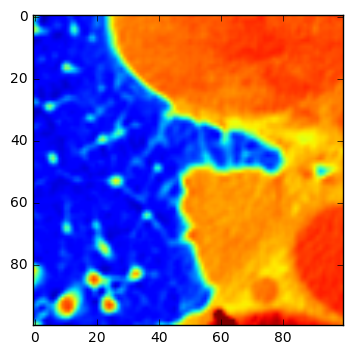

In [18]:
for img in img_array[4350:4351]:
    plt.figure
    plt.imshow(img[0], vmin=0, vmax=255)

In [19]:
img_array[0]

array([[[   2.1857,    4.9179,   10.3821, ...,  195.9857,  197.625 ,  183.0536],
        [  13.4786,   14.5714,   16.575 , ...,  198.5357,  195.2571,  179.9571],
        [  25.3179,   20.4   ,   14.5714, ...,  191.7964,  183.4179,  175.0393],
        ..., 
        [ 255.    ,  253.3607,  247.35  , ...,  164.1107,  157.5536,  150.6321],
        [ 255.    ,  255.    ,  255.    , ...,  163.2   ,  150.45  ,  144.075 ],
        [ 255.    ,  255.    ,  255.    , ...,  161.7429,  151.725 ,  153.7286]],

       [[   2.1857,    4.9179,   10.3821, ...,  195.9857,  197.625 ,  183.0536],
        [  13.4786,   14.5714,   16.575 , ...,  198.5357,  195.2571,  179.9571],
        [  25.3179,   20.4   ,   14.5714, ...,  191.7964,  183.4179,  175.0393],
        ..., 
        [ 255.    ,  253.3607,  247.35  , ...,  164.1107,  157.5536,  150.6321],
        [ 255.    ,  255.    ,  255.    , ...,  163.2   ,  150.45  ,  144.075 ],
        [ 255.    ,  255.    ,  255.    , ...,  161.7429,  151.725 ,  153.7286]

In [20]:
 img_array.shape

(4351, 3, 100, 100)

In [21]:
img.shape

(3, 100, 100)

In [22]:
type(img[0][0][0])

numpy.float32

In [23]:
type(img_array[0][0][0][0])

numpy.float32

In [24]:
len(image_labels)

4351

In [25]:
type(image_labels[19])

numpy.int16

In [26]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [27]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 3000.,  1351.], dtype=float32)

In [28]:
type(ohe_image_labels[0][0])

numpy.float32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [31]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [32]:
trn.shape

(3480, 3, 100, 100)

In [33]:
type(val[0][0][1][0])

numpy.float32

In [34]:
batch_size = 4

In [35]:
type(val[1][0][1][0])

numpy.float32

In [36]:
# model.fit(trn, 
#           trn_labels, 
#           batch_size=batch_size, 
#           nb_epoch=1, 
#           validation_data=(val, val_labels),verbose = 1)


In [37]:
# model.save_weights(data_path+'results/ft1.h5')

In [38]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [39]:
conv_layers

In [40]:
conv_model = Sequential(conv_layers)

In [41]:
%time conv_trn_feat = conv_model.predict(trn)

CPU times: user 1min 36s, sys: 605 ms, total: 1min 36s
Wall time: 1min 39s


In [42]:
conv_trn_feat.shape

(3480, 512, 6, 6)

In [43]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 19.9 s, sys: 58.4 ms, total: 19.9 s
Wall time: 19.9 s


In [44]:
conv_val_feat.shape

(871, 512, 6, 6)

In [45]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [46]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [47]:
save_array(data_path+'results/conv_trn_feat.dat', conv_trn_feat)

## Model Training

In [48]:
conv_val_feat = load_array(data_path+'results/conv_val_feat.dat')

In [49]:
conv_val_feat.shape

(871, 512, 6, 6)

In [50]:
conv_trn_feat = load_array(data_path+'results/conv_trn_feat.dat')

In [51]:
conv_trn_feat.shape

(3480, 512, 6, 6)

In [82]:
nf=512; p=0.7

In [83]:
def get_fc_layers():
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4.),
        Flatten(),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p/2.),
        Dense(2, activation='softmax'),
    ]


In [84]:
lrg_model = Sequential(get_fc_layers())

In [85]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 6, 6), (None, 2))

In [86]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
maxpooling2d_8 (MaxPooling2D)    (None, 512, 3, 3)     0           maxpooling2d_input_3[0][0]       
____________________________________________________________________________________________________
batchnormalization_7 (BatchNorma (None, 512, 3, 3)     2048        maxpooling2d_8[0][0]             
____________________________________________________________________________________________________
dropout_7 (Dropout)              (None, 512, 3, 3)     0           batchnormalization_7[0][0]       
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 4608)          0           dropout_7[0][0]                  
___________________________________________________________________________________________

In [87]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/1
3480/3480 [==============================] - 5s - loss: 0.8423 - acc: 0.6603 - val_loss: 0.4785 - val_acc: 0.7853

In [89]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 5s - loss: 0.5519 - acc: 0.7365 - val_loss: 0.4636 - val_acc: 0.7738

In [90]:
# lrg_model.optimizer.lr = 0.0001

In [91]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
          validation_data=(conv_val_feat, val_labels))


Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 5s - loss: 0.4173 - acc: 0.8126 - val_loss: 0.4088 - val_acc: 0.8335

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 5s - loss: 0.3552 - acc: 0.8511 - val_loss: 0.4104 - val_acc: 0.8289

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 5s - loss: 0.3295 - acc: 0.8563 - val_loss: 0.4252 - val_acc: 0.8117

In [94]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 5s - loss: 0.2679 - acc: 0.8853 - val_loss: 0.4235 - val_acc: 0.8197

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

In [96]:
weights_dir = '/Volumes/Backups/data/LUNA16/weights'

In [ ]:
lrg_model.save_weights(weights_dir + 'vgg100x100-fc-2layer-nd512-p0d7.h5')

In [304]:
lrg_model.load_weights(weights_dir + 'fc-2-layer-p0d875.h5')

In [305]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 1600 samples, validate on 400 samples
Epoch 1/1
1600/1600 [==============================] - 20s - loss: 0.1339 - acc: 0.9487 - val_loss: 0.5812 - val_acc: 0.7450

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [67]:
!git add cnnvggF.ipynb

In [68]:
!git commit -m "VggBN + Jeremy Howard 512 dense fc model on 4351 (1351+3000) 100x100 images, dropout=0.6"

[master edef942] VggBN + Jeremy Howard 512 dense fc model on 4351 (1351+3000) 100x100 images, dropout=0.6
 1 file changed, 6997 insertions(+), 2329 deletions(-)


In [69]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 140.39 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   06439aa..edef942  master -> master


In [12]:
!ls -lh /Volumes/Backups/data/LUNA16/patches/224x224/patches1/ | wc -l

    1352
